In [1]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import math

In [2]:
from scipy.signal import triang
from scipy.fftpack import fft, ifft

In [3]:
run Important_Functions.ipynb

# FFT of a triangular wave

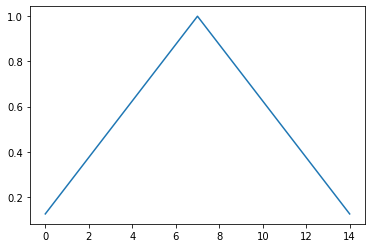

In [4]:
# Generating a triangular wave
x = triang(15)
plt.plot(x)
# This is not a zero centered function

In [5]:
# Performs fft analysis of generated triangular wave and outputs a spectrum in terms of complex numbers
X = fft(x)
X

array([ 8.00000000e+00+0.j        , -2.79759784e+00-0.59464778j,
        2.98381159e-02+0.01328479j, -2.64754249e-01-0.19235522j,
        2.50553568e-02+0.02782679j, -6.25000000e-02-0.10825318j,
        1.47542486e-02+0.04540891j, -7.29562994e-03-0.06941328j,
       -7.29562994e-03+0.06941328j,  1.47542486e-02-0.04540891j,
       -6.25000000e-02+0.10825318j,  2.50553568e-02-0.02782679j,
       -2.64754249e-01+0.19235522j,  2.98381159e-02-0.01328479j,
       -2.79759784e+00+0.59464778j])

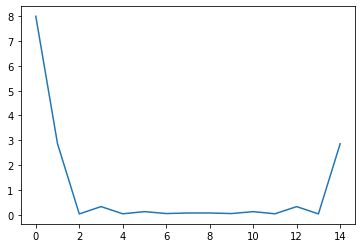

In [6]:
# Getting the magnitude of the spectrum
mX = abs(X)
plt.plot(mX)
# The generated plot here is symmetric around zero [you can think it as circular]

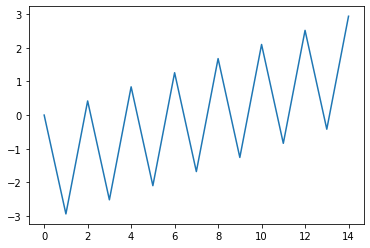

In [7]:
# Getting the phase of the spectrum
pX = np.angle(X)
plt.plot(pX)

# Here the phase is clumsy or not exactly saying something about the signal 
# To make the phase more informative, we do the zero centering [ zero padding and zero phase windowing ], 
# which is explained in the next part

# FFT of zero centered triangular function

Text(0.5, 1.0, 'Not zero centered')

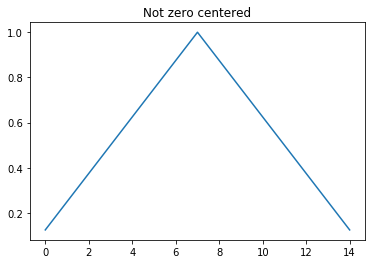

In [8]:
# Generate a triangular function
len = 15
half = int(len / 2)
x = triang(len)
plt.plot(x)
plt.title('Not zero centered')

Text(0.5, 1.0, 'Zero centered')

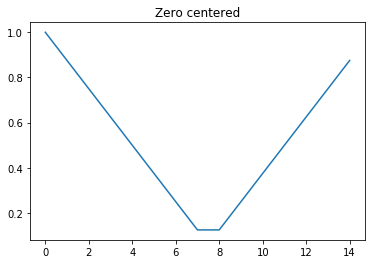

In [9]:
# create a buffer to make the generated signal zero centered
# i.e. to locate the triangle around zero
# The first part of buffer is end part of the main signal and
# The second part of the buffer is the first/beginning part of the signal
fftbuffer = np.zeros(len)
fftbuffer[:half+1] = x[half:]
fftbuffer[half+1:] = x[:half]
plt.plot(fftbuffer)
plt.title('Zero centered')

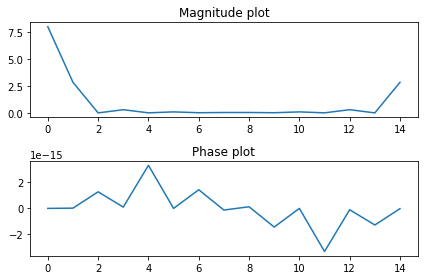

In [10]:
# There will be no change in the FFT analysis [ The shifting property of the FT ]

X = fft(fftbuffer)
mX = abs(X)
pX = np.angle(X)

# There will be no change in the magnitude part
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(mX)
ax1.set_title('Magnitude plot')

# But the phase plot will be more informative in this case
ax2 = fig.add_subplot(2,1,2)
ax2.plot(pX)
ax2.set_title('Phase plot')
fig.tight_layout()

# As we can see the order of y-axis in the phase plot is of 1e-15, which is a very small number and 
# the pase of the signal can be regarded as zero [ which is a property of the triangular signal ]

# FFT on audio signal

In [12]:
file = 'sounds/soprano-E4.wav'

In [50]:
import IPython.display as ipd
ipd.Audio(file) # load a local WAV file

In [70]:
# Librosa load outputs a numpy array containing the signal and also the sampling rate [sampling frequency]
x, sr = librosa.load(file)

In [52]:
x.shape

(25936,)

In [53]:
sr

22050

In [54]:
# FFT analysis on whole signal can be cumbersome and takes a lot of time
# To reduce the time taken for computing FFT, we can select a part of the signal
# i.e. we only apply FFT on a part of signal 

# part of the signal is represented/ controlled by window size
# Denoted usually by M
M = 501

# As we discussed earlier, we need to do zero padding and zero phase windowing in order to better analyse the signal
# For that we need to divide the selected window into two parts
hM1 = int(math.floor((M+1)/2))
hM2 = int(math.floor((M)/2))

(hM1, hM2)

(251, 250)

In [66]:
# Also the window can start from any location in the input array/signal

start = 5000

# Selected signal
x1 = x[start:start+M] * np.hamming(M)


# FFT Size [may be equal or greater than the window size]
# Should be power of 2
N = 512

# Zero sentering and zero phase windowing and loading into buffer
fftbuffer = np.zeros(N)

fftbuffer[:hM1] = x1[hM2:]
fftbuffer[N - hM2:] = x1[:hM2]

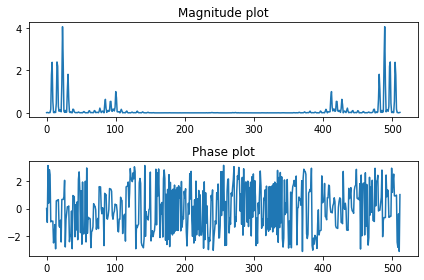

In [81]:
# Now we can perform FFT on the buffer
X = fft(fftbuffer)

# Magnitude 
mX = np.abs(X)
# Phase
pX = np.angle(X)

# Magnitude Plot
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(mX)
ax1.set_title('Magnitude plot')

# Phase Plot
ax2 = fig.add_subplot(2,1,2)
ax2.plot(pX)
ax2.set_title('Phase plot')
fig.tight_layout()

# FFT Function

In [111]:
def FFT(x, start, window = 501, FFT_size = 512, log = True, unwrap = True, synthesize = True):
    """ 
    Performs FFT analysis on the selected window of input signal
    """
    # Calculating durations of first half and second half
    hM1 = int(math.floor((window+1)/2))
    hM2 = int(math.floor((window)/2))
    
    # Select the window
    x1 = x[start:start+window] * np.hamming(window)
    
    # Zero centering and zero phase windowing [Zero padding]
    fftbuffer = np.zeros(FFT_size)

    fftbuffer[:hM1] = x1[hM2:]
    fftbuffer[FFT_size - hM2:] = x1[:hM2]
    
    # FFT on window
    X = fft(fftbuffer)
    
    # Magnitude 
    mX = np.abs(X)
    # Phase
    pX = np.angle(X)
    
    if log:
        # Magnitude in dB 20log_base10(abs(mX))
        mX = 20 * np.log10(np.abs(X))
    if unwrap:
        # Unwrapping phase for better visualizations and understanding
        pX = np.unwrap(pX)
    
    return mX, pX
    

def plotMagPhase(mX, pX, half = True):

    if half:
        plot_size =  int(math.floor(mX.shape[0]/2))
        mX = mX[:plot_size]
        pX = pX[:plot_size]
        
    # Magnitude Plot
    fig = plt.figure()
    
    ax1 = fig.add_subplot(2,1,1)
    ax1.plot(mX)
    ax1.set_title('Magnitude plot')

    # Phase Plot
    ax2 = fig.add_subplot(2,1,2)
    ax2.plot(pX)
    ax2.set_title('Phase plot')
    fig.tight_layout()

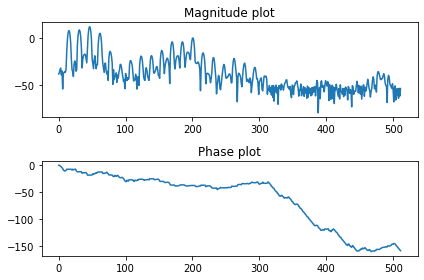

In [112]:
mX, pX = FFT(x, 5000, 501, 1024)
plotMagPhase(mX, pX)

In [113]:
x, fs = librosa.load(file)

In [114]:
# If time is taken as reference for the start of the window
time = 0.2  # in seconds
M = 511     # Window size
x1 = x[int(time * fs) : int(time * fs ) + M]

# Inverse FFT